# EDA for lab data

### importing the data and calling the function to get data as type DataFrame

##### making a copy of the raw data before cleaning

In [1297]:
from taxipred.utils.constants import get_taxi_data

df = get_taxi_data()

df_raw = df.copy()

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


### inspecting columns, range, type, nulls

In [1298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [1299]:
df.shape

(1000, 11)

### Exploring values

In [1300]:
df.describe(include="all")

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950,950,950.000000,950,950,950.000000,950.000000,950.000000,950.000000,951.000000
unique,NaN,4,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Afternoon,Weekday,NaN,Low,Clear,NaN,NaN,NaN,NaN,NaN
freq,NaN,371,655,NaN,397,667,NaN,NaN,NaN,NaN,NaN
mean,27.070547,NaN,NaN,2.476842,NaN,NaN,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,NaN,NaN,1.102249,NaN,NaN,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,NaN,NaN,1.000000,NaN,NaN,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,NaN,NaN,1.250000,NaN,NaN,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,NaN,NaN,2.000000,NaN,NaN,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,NaN,NaN,3.000000,NaN,NaN,4.260000,1.610000,0.390000,89.055000,69.099350


### Checking missing values

In [1301]:
df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

### Sorting the columns by data types 

In [1302]:
import seaborn as sns
import matplotlib.pyplot as plt

# dtype object
categorical_columns = df.select_dtypes(include=['object']).columns

# dtype int, float
numeric_columns = df.select_dtypes('number').columns



### Plotting numeric columns checking for outliers using box plot

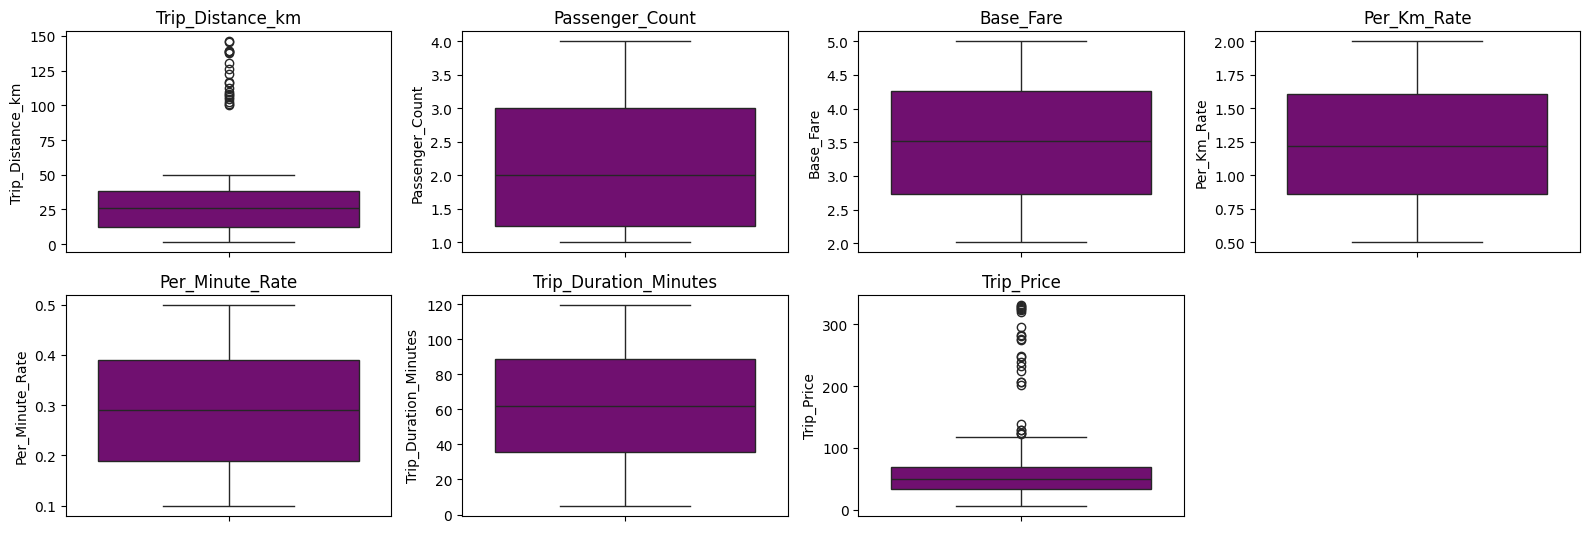

In [1303]:
plt.figure(figsize=(16,8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col], color="purple")
    plt.title(f"{col}")
plt.tight_layout()
plt.show()  

### More plotting of data for visual exploration of data

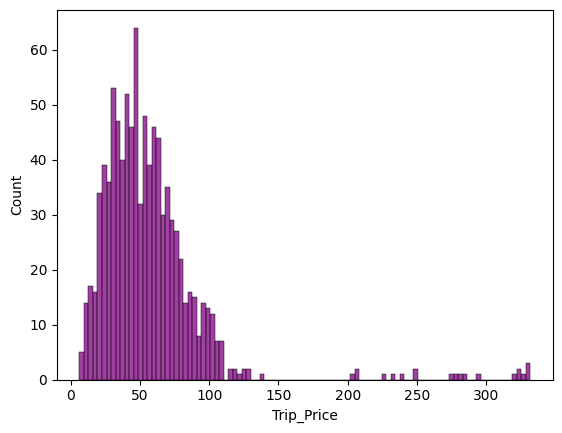

In [1304]:
sns.histplot(df["Trip_Price"], bins=100, color="purple")
plt.show()

### identifying unique values of the categorical columns

In [1305]:
for col in categorical_columns:
    print(f"{col} has {df[col].nunique()} unique values: {df[col].unique()}")   
# https://www.kaggle.com/code/aymendn/data-science-mini-project#2)-Clean-your-data

Time_of_Day has 4 unique values: ['Morning' 'Afternoon' 'Evening' 'Night' nan]
Day_of_Week has 2 unique values: ['Weekday' 'Weekend' nan]
Traffic_Conditions has 3 unique values: ['Low' 'High' 'Medium' nan]
Weather has 3 unique values: ['Clear' nan 'Rain' 'Snow']


### Plotting the categorical columns against Trip_Price

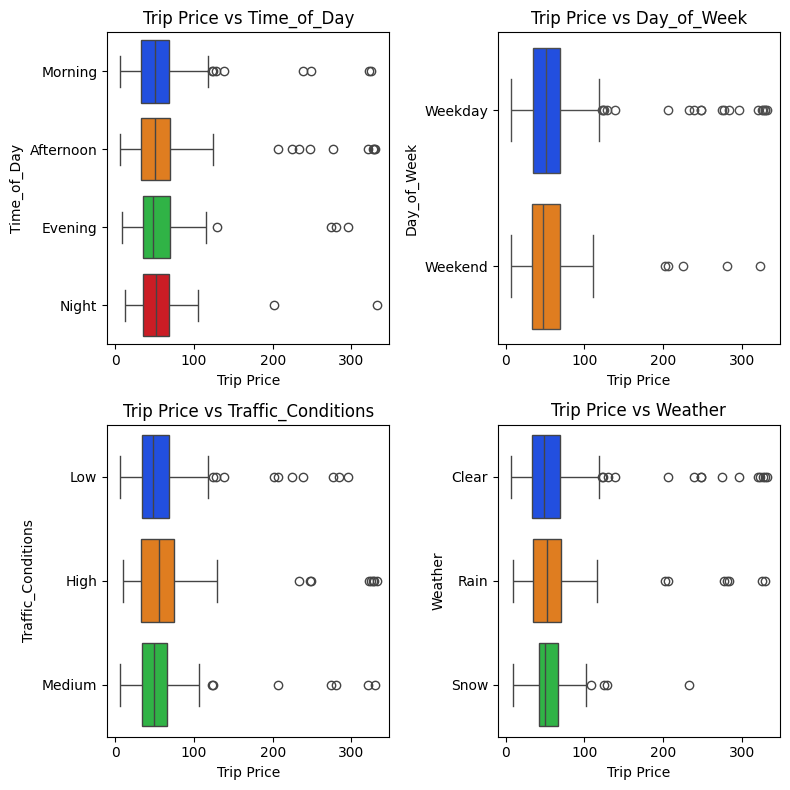

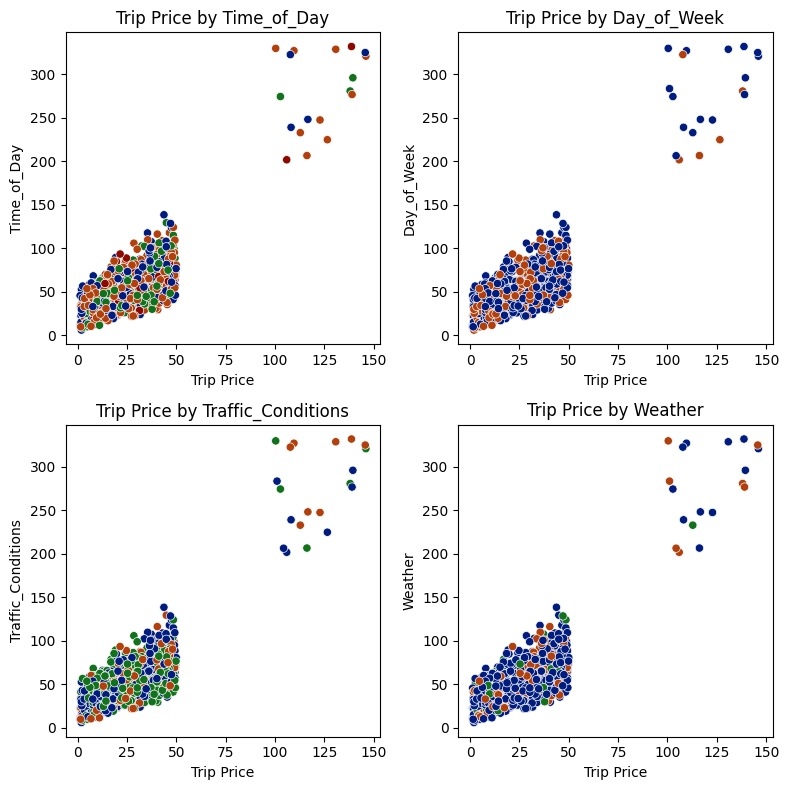

In [1306]:
plt.figure(figsize=(8, 8))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        hue=col, 
        data=df,
        x="Trip_Price",
        y=col,
        orient="h",
        palette="bright",
        legend=False
    )
    plt.title(f"Trip Price vs {col}")
    plt.xlabel("Trip Price")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(
        hue=col, 
        data=df,
        x="Trip_Distance_km",
        y="Trip_Price",
        palette="dark",
        legend=False
    )
    plt.title(f"Trip Price by {col}")
    plt.xlabel("Trip Price")
    plt.ylabel(col)

plt.tight_layout()
plt.show()



### Correlationmap, Heatmap numeric features in raw data

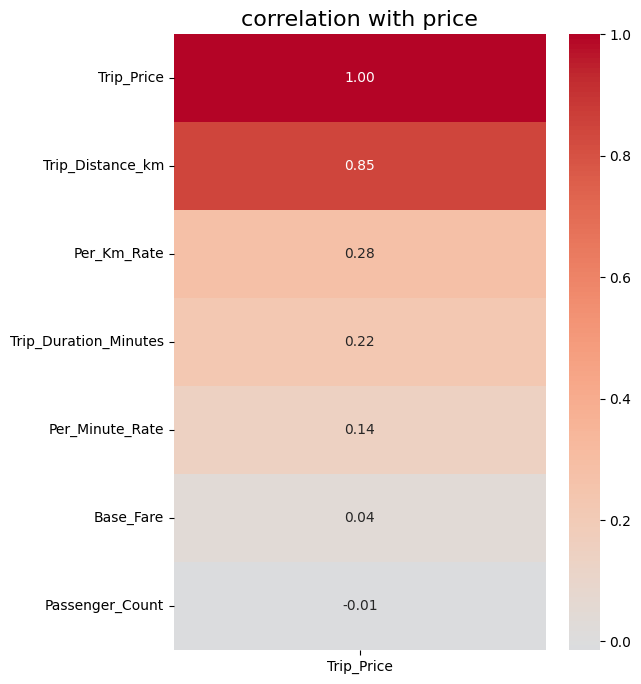

<Axes: >

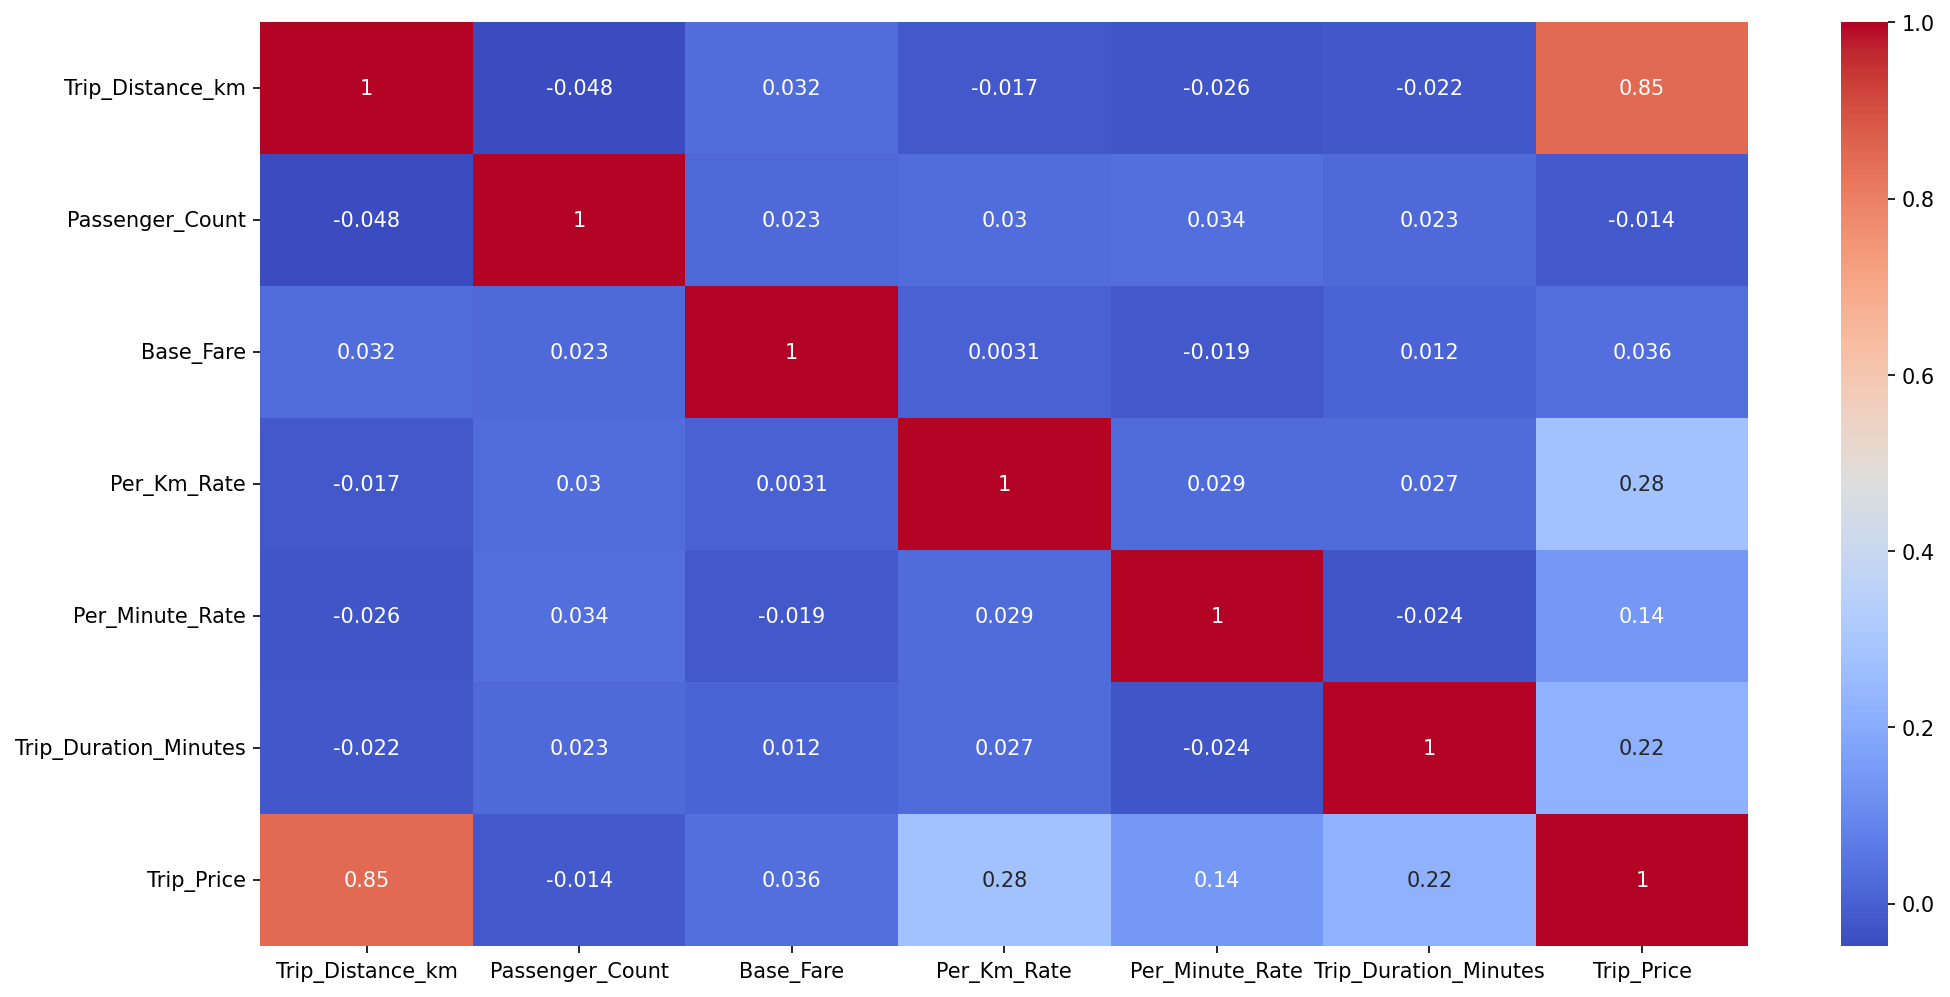

In [1307]:
correlations = df.corr(numeric_only=True)[["Trip_Price"]].sort_values(
    by="Trip_Price", ascending=False
)

plt.figure(figsize=(6, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("correlation with price", fontsize=16)
plt.show()

fig,ax = plt.subplots(1, figsize=(16,8), dpi=150)

sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)

## Cleaning data

### identify and remove numeric outliers 

In [1308]:
import numpy as np

target = "Trip_Price" # or is variable enough?

numeric_features = df[numeric_columns.drop(target)]

def handle_outliers(df, cols, multiplier=1.5):
    df_removed = df.copy()
    df_clipped = df.copy()

    for col in cols:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - multiplier * IQR
            upper = Q3 + multiplier * IQR

            # 2 separate methods
            # Remove rows containing outliers
            before_rows = len(df_removed)
            mask = (df_removed[col] >= lower) & (df_removed[col] <= upper)
            df_removed = df_removed[mask]
            removed_rows = before_rows - len(df_removed)

            # Clip values within bounds
            clipped_before = df_clipped[col].copy()
            df_clipped[col] = np.clip(df_clipped[col], lower, upper)
            clipped_count = (clipped_before != df_clipped[col]).sum()

            print(f"{col}:")
            print(f"  Values: {removed_rows} ({removed_rows / len(df) * 100:.2f}%)")
            print(f"  Values clipped: {clipped_count} ({clipped_count / len(df) * 100:.2f}%)\n")

    return df_removed, df_clipped
df_removed, df_clipped = handle_outliers(df, numeric_features)


Trip_Distance_km:
  Values: 70 (7.00%)
  Values clipped: 70 (7.00%)

Passenger_Count:
  Values: 45 (4.50%)
  Values clipped: 50 (5.00%)

Base_Fare:
  Values: 47 (4.70%)
  Values clipped: 50 (5.00%)

Per_Km_Rate:
  Values: 43 (4.30%)
  Values clipped: 50 (5.00%)

Per_Minute_Rate:
  Values: 43 (4.30%)
  Values clipped: 50 (5.00%)

Trip_Duration_Minutes:
  Values: 37 (3.70%)
  Values clipped: 50 (5.00%)



In [1309]:
df_clipped.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [1310]:
df_removed.isnull().sum()

Trip_Distance_km          0
Time_of_Day              40
Day_of_Week              33
Passenger_Count           0
Traffic_Conditions       38
Weather                  38
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price               31
dtype: int64

### Splitting the data into target (trip_price) and features (columns)

In [1311]:
X, y = df.drop("Trip_Price", axis = "columns"), df["Trip_Price"]
X.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64


### Drop lesser correlating columns